# EDA - Titanic Dataset

In [161]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [162]:
train = pd.read_csv('train.csv')
train.head() 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [163]:
train.info()
# Pclass = Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
# SibSp = Number of Siblings/Spouses Aboard
# Parch = Number of Parents/Children Aboard
# Embarked = Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# EDA     
## Missing Data

In [164]:
# train.isnull()
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: >

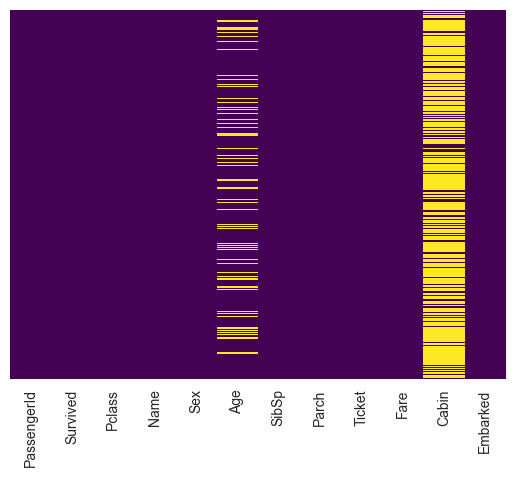

In [165]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

C:\Users\User\AppData\Local\Temp\ipykernel_20084\2340937611.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Survived', data=train , palette= 'gist_rainbow')


<Axes: xlabel='Survived', ylabel='count'>

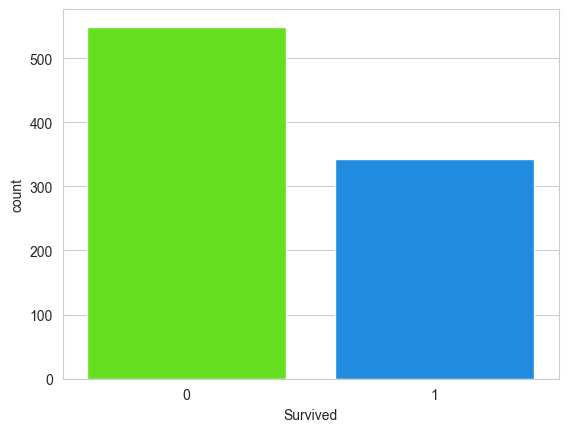

In [166]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', data=train , palette= 'gist_rainbow')


<Axes: xlabel='Survived', ylabel='count'>

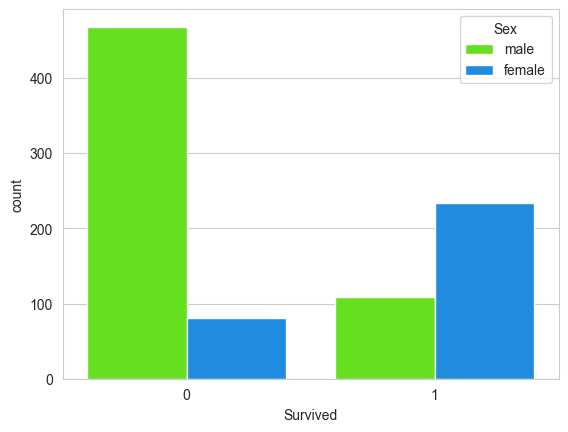

In [167]:
sns.countplot(x='Survived',hue='Sex', data=train , palette= 'gist_rainbow')

<Axes: xlabel='Survived', ylabel='count'>

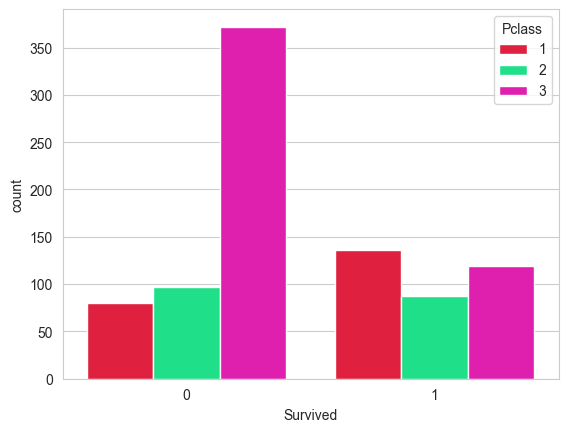

In [168]:
sns.countplot(x='Survived', hue='Pclass', data=train, palette='gist_rainbow')

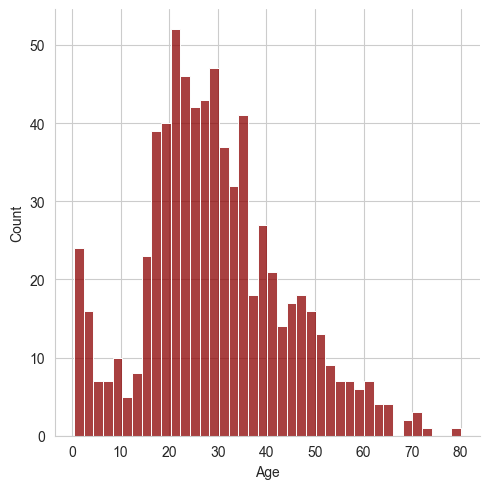

In [169]:
sns.displot(train['Age'].dropna(), kde=False, color='darkred', bins=40)
# dropna() removes the null values
# kde = kernel density estimation
# bins = number of bars in the histogram

<Axes: >

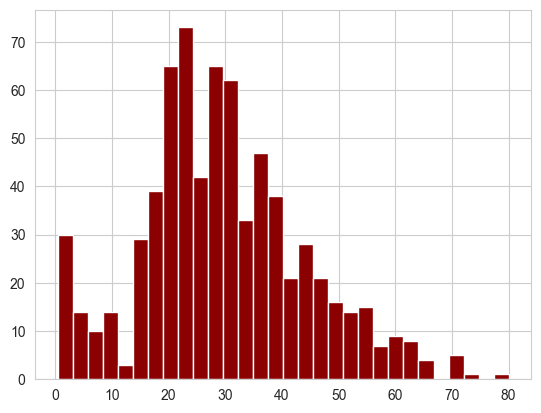

In [170]:
# plot using matplotlib
train['Age'].hist(bins=30, color='darkred', alpha=1)

C:\Users\User\AppData\Local\Temp\ipykernel_20084\1938612865.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='SibSp', data=train, palette='gist_rainbow')


<Axes: xlabel='SibSp', ylabel='count'>

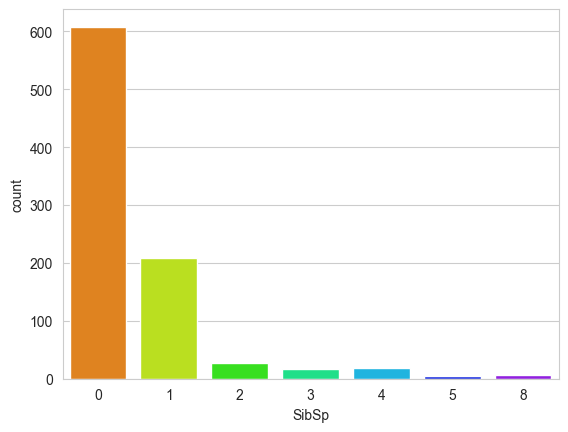

In [171]:
sns.countplot(x='SibSp', data=train, palette='gist_rainbow')
# Sibsp [siblings, spouses]
# Most of the people were travelling alone

<Axes: >

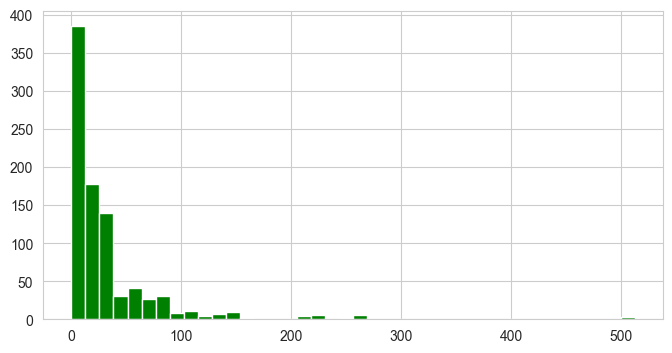

In [172]:
train['Fare'].hist(color='green', bins=40, figsize=(8,4))

## Data Cleaning

C:\Users\User\AppData\Local\Temp\ipykernel_20084\2143504536.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Pclass',y='Age',data=train,palette='gist_rainbow')


<Axes: xlabel='Pclass', ylabel='Age'>

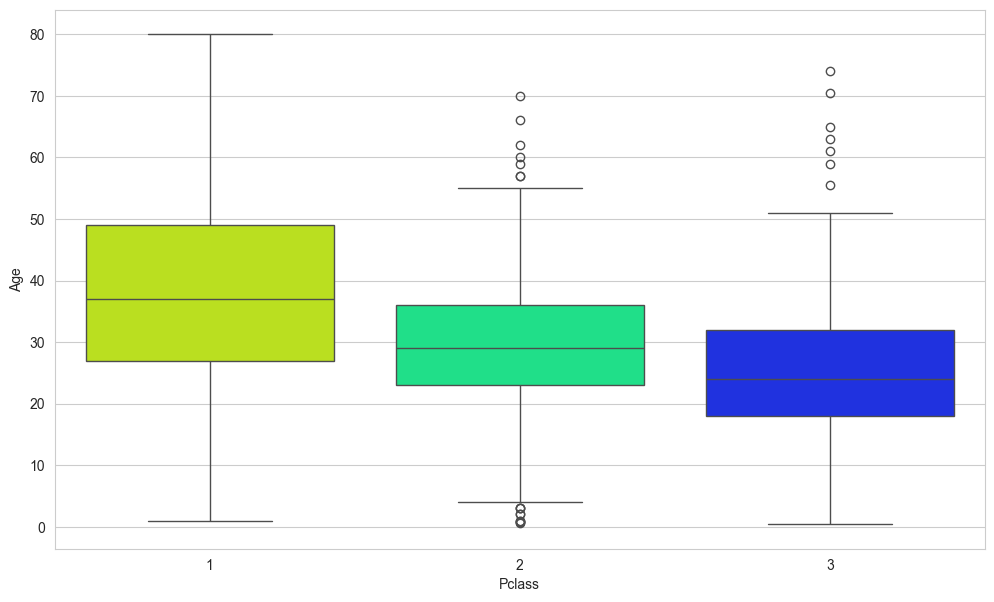

In [173]:
plt.figure(figsize = (12,7))
sns.boxplot(x='Pclass',y='Age',data=train,palette='gist_rainbow')

In [174]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
     
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [175]:
train['Age'] = train[['Age', 'Pclass']].apply(impute_age, axis=1)

C:\Users\User\AppData\Local\Temp\ipykernel_20084\3547609416.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Age = cols[0]
C:\Users\User\AppData\Local\Temp\ipykernel_20084\3547609416.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Pclass = cols[1]


<Axes: >

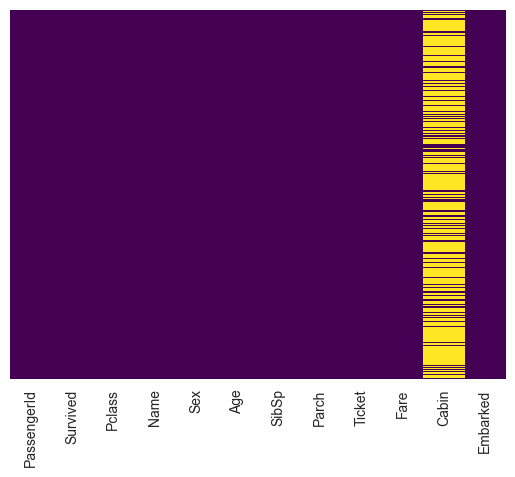

In [176]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [177]:
# drop the cabin column
train.drop('Cabin', axis=1, inplace=True)


In [178]:

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [179]:
train.dropna(inplace=True)
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

## convert categorical features to dummy variables using pandas

In [180]:
embarked = pd.get_dummies(train['Embarked'], drop_first=True).head() 
embarked.head()
# drop_first = True to avoid multic

,Q,S
0,False,True
1,False,False
2,False,True
3,False,True
4,False,True


In [181]:
sex = pd.get_dummies(train['Sex'], drop_first=True)
sex.head()

,male
0,True
1,False
2,False
3,False
4,True


In [182]:
train.drop(['PassengerId','Sex', 'Embarked', 'Name', 'Ticket'], axis=1, inplace=True)

In [183]:
train.head()    

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


In [185]:
train = pd.concat([train,sex,embarked], axis=1)
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,True,False,True
1,1,1,38.0,1,0,71.2833,False,False,False
2,1,3,26.0,0,0,7.9250,False,False,True
3,1,1,35.0,1,0,53.1000,False,False,True
4,0,3,35.0,0,0,8.0500,True,False,True
